In [1]:
import random
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap, Normalize
import igraph as ig
import seaborn
import networkx as nx
import pandas as pd
import numpy as np
import os
import math
import re
from collections import Counter
import scipy.stats
import seaborn as sns
from matplotlib.font_manager import FontProperties  # 导入FontProperties
import warnings
warnings.filterwarnings("ignore")

In [2]:
fLauCounter = pd.read_csv(r"E:\netData\MAG-nobel\2 Nobel laureates counterparts\counterparts.zip")
fLau = pd.read_csv(r"E:\netData\MAG-nobel\361 Nobel laureates.csv")

In [3]:
fLauCounter0 = fLauCounter[['pub num','total cit', 'h', 'g','hitcitnum','If Prize' , 'Field']]
fLauCounter0.columns = ['pub num','total cit', 'h-index', 'g-index','Apex index','If Prize' , 'Field']

In [19]:
fLau0 = fLau[['pub num','total cit', 'h', 'g','hitcitnum' , 'field']]
fLau0['If Prize'] = 1
fLau0.columns = ['pub num','total cit', 'h-index', 'g-index','Apex index', 'field','If Prize']

In [20]:
fLau1 = fLau0[fLau0['field']=='Physics']
fLau2 = fLau0[fLau0['field']=='Chemistry']
fLau3 = fLau0[fLau0['field']=='Medicine ']

In [21]:
fLauCounter1 = fLauCounter0[fLauCounter0['Field']=='Physics']
fLauCounter2 = fLauCounter0[fLauCounter0['Field']=='Chemistry']
fLauCounter3 = fLauCounter0[fLauCounter0['Field']=='Medicine']

In [22]:
ff1 = pd.concat([fLau1 , fLauCounter1])
ff2 = pd.concat([fLau2 , fLauCounter2])
ff3 = pd.concat([fLau3 , fLauCounter3])

# IR

In [23]:
def get_IR(threshold , v , f1):
    k = int(np.floor(len(f1)*threshold))
    f2 = f1.sort_values([v],ascending= False)
    f21 = f2.head(k)
    d = len(f21[f21['If Prize']==1])/301
    return d

In [24]:
flst = [ff1, ff2, ff3]

In [49]:
thresholds = [0.2,0.3]

In [50]:
vlst = ['pub num','total cit', 'h-index', 'g-index','Apex index']

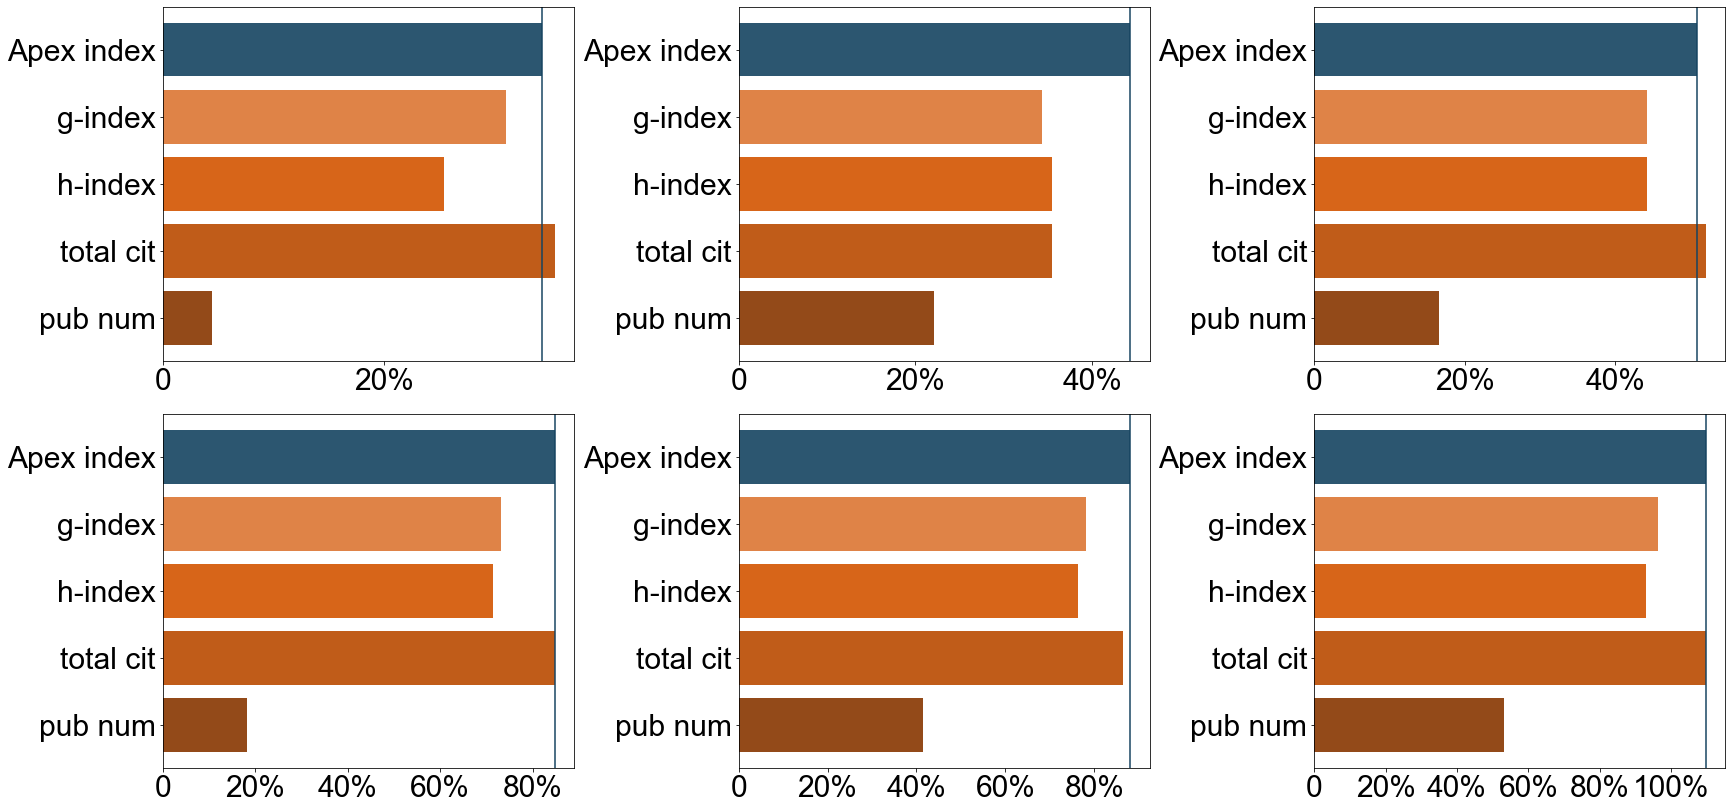

In [51]:
plt.subplots(2,3,figsize=(28,14))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.4,hspace=0.15)

for i in range(len(flst)):
    f = flst[i]
    for j in range(2):
        threshold = thresholds[j]
        dlst = [get_IR(threshold , v , f) for v in vlst]
        ax = plt.subplot(2,3,i+1+j*3)
        plt.rcParams['font.sans-serif'] = ['Arial']  # Use a Chinese font
        c = ['#873600','#BA4A00','#D35400','#DC7633',"#154360"]
        y_pos = [1,2,3,4,5]
        if j ==0:
            plt.xticks([0,0.06,0.12,0.18,0.24,0.30] , [0 , '20%' , '40%', '60%', '80%', '100%'],fontsize=20)
        if j ==1:
            plt.xticks([0,0.04,0.08,0.12,0.16,0.20] , [0 , '20%' , '40%', '60%', '80%', '100%'],fontsize=20)
        plt.axvline(x=dlst[4], c = '#154360')
        plt.barh(y_pos,dlst,align='center', color= c,alpha=0.9,capsize=10)
        plt.yticks(y_pos,['pub num','total cit', 'h-index', 'g-index','Apex index'],fontsize = 30)
        plt.xticks(fontsize=30)

plt.savefig(r"F:\A J YANG PAPER\Nobel analysis\STI apex index\figs\fig 5\1.pdf",bbox_inches = 'tight')

# AR

In [54]:
def get_AR( v , f1):
    f2 = f1.sort_values([v],ascending= False)
    f2.index = range(len(f2))
    lst = f2[f2['If Prize']==1].index
    d = sum(lst)/len(lst)
    return d

def get_AR2( v , f1):
    f2 = f1.sort_values([v],ascending= False)
    f2.index = range(len(f2))
    lst = f2[f2['If Prize']==1].index
    d = sum(lst)/(lst[-1] - lst[0])/len(lst)
    return d

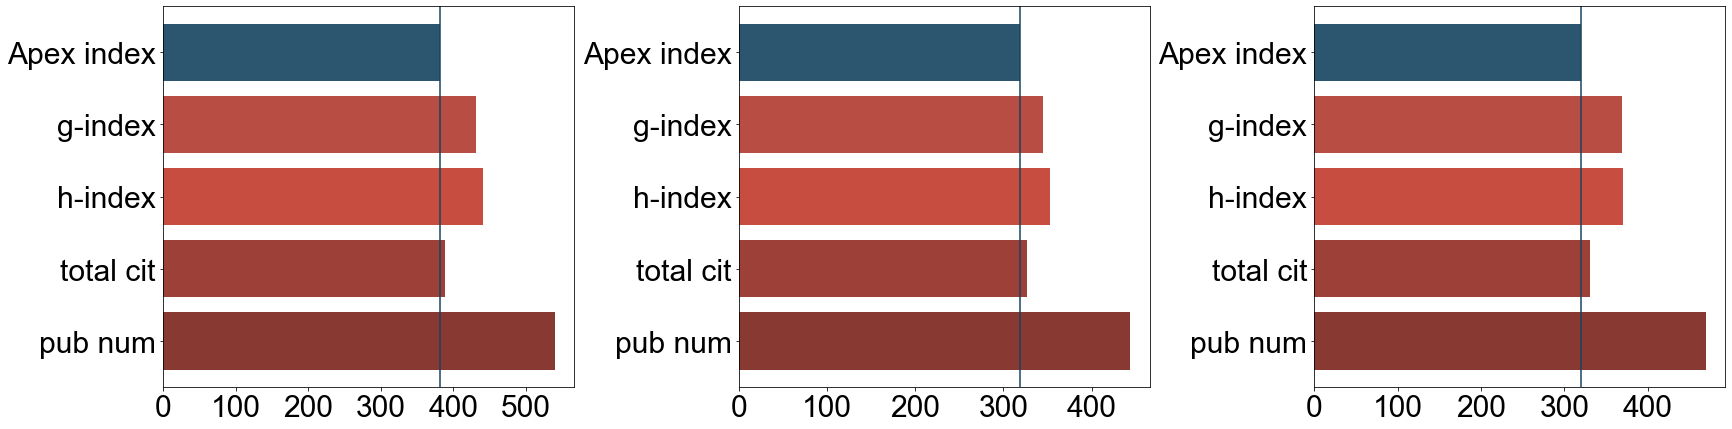

In [55]:
plt.subplots(1,3,figsize=(28,7))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.4,hspace=0.15)

for i in range(len(flst)):
    f = flst[i]
    dlst = [get_AR(v , f) for v in vlst]
    ax = plt.subplot(1,3,i+1)
    c = ['#7B241C','#922B21','#C0392B','#B03A2E',"#154360"]
    y_pos = [1,2,3,4,5]
    plt.barh(y_pos,dlst,align='center', color= c,alpha=0.9,capsize=10)
    plt.axvline(x=dlst[4], c = '#154360')
    plt.yticks(y_pos,['pub num','total cit', 'h-index', 'g-index','Apex index'],fontsize = 30)
    plt.xticks(fontsize=30)
plt.savefig(r"F:\A J YANG PAPER\Nobel analysis\STI apex index\figs\fig 5\2.pdf",bbox_inches = 'tight')